# ADVANCE ANALYSIS

In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('clean_data_final.xlsx')

In [3]:
df.head()

,ORDER_ID,ORDER_DATE,ORDER_STATUS,ORDER_TOTAL,ORDER_ORIGIN,PAYMENT_TITLE,PAYMENT_PRICE,PAYMENT_CARD_TYPE,PRODUCT_AMOUNT,PRODUCT_PRICE,...,PRODUCT_TITLE1,PRODUCT_DISCOUNT,CUSTOMER_COUNTRY,CUSTOMER_CITY,CUSTOMER_POSTCODE,DELIVERY_PRICE,CUSTOMER_FIRSTNAME,CUSTOMER_LASTNAME,CUSTOMER_ADDRESS,AMOUNT_SPENT
0,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0,dankort,1,47.96,...,Sprøjtepose og tyller sæt (7 dele),0.00,DK,Ringsted,4100,39.0,Stine,Duran,Askevang 3,47.96
1,103604,2018-07-01 00:30:52,3,198.9,webshop,Kreditkortbetaling,0,dankort,1,120.00,...,Funcakes spiselig pastafarver sæt/8,40.04,DK,Ringsted,4100,39.0,Stine,Duran,Askevang 3,79.96
2,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0,dankort,1,103.96,...,"Brudepar topfigur - hånd-i-hånd, 14 cm",0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16,103.96
3,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0,dankort,1,27.96,...,Kagelys 2D med Skye Paw Patrol,0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16,27.96
4,103605,2018-07-01 06:45:05,3,523.5,webshop,Kreditkortbetaling,0,dankort,8,31.96,...,Sukkerdekoration hvide margueritter (12 stk.),0.00,DK,Korsør,4220,39.0,Laszlo,Bochesa,Tyreengen 16,255.68


In [4]:
df2 = df.copy()

In [5]:
df2['CUSTOMER_FULL_NAME'] = df2['CUSTOMER_FIRSTNAME'].astype(str) + df2['CUSTOMER_LASTNAME'].astype(str)

df2['CUSTOMER_FULL_NAME'] = df2['CUSTOMER_FULL_NAME'].str.strip()

In [6]:
new_column_order =['ORDER_DATE',
                     'ORDER_STATUS',
                     'ORDER_ID',
                     'PRODUCT_ID',
                     'PRODUCT_PRICE',
                     'PRODUCT_AMOUNT',
                     'AMOUNT_SPENT',
                     'ORDER_TOTAL',
                     'PAYMENT_PRICE',
                     'PRODUCT_TITLE1',
                     'PRODUCT_DISCOUNT',
                     'DELIVERY_PRICE',
                     'ORDER_VAT',
                     'STOCK_LOCATION_ID',
                     'CUSTOMER_FIRSTNAME',
                     'CUSTOMER_LASTNAME',
                     'CUSTOMER_FULL_NAME',
                     'CUSTOMER_COMPANY',
                     'CUSTOMER_CVR',
                     'CUSTOMER_EAN',
                     'CUSTOMER_POSTCODE',
                     'CUSTOMER_CITY',
                     'CUSTOMER_COUNTRY',
                     'CUSTOMER_COUNTRY_ID',
                     'CUSTOMER_COUNTRY_CODE',]


In [7]:
df5 = df2.reindex(columns=new_column_order)

In [8]:
df5.isnull().sum()

ORDER_DATE                    0
ORDER_STATUS                  0
ORDER_ID                      0
PRODUCT_ID                    0
PRODUCT_PRICE                 0
PRODUCT_AMOUNT                0
AMOUNT_SPENT                  0
ORDER_TOTAL                   0
PAYMENT_PRICE                 0
PRODUCT_TITLE1                0
PRODUCT_DISCOUNT              0
DELIVERY_PRICE                0
ORDER_VAT                171387
STOCK_LOCATION_ID        171387
CUSTOMER_FIRSTNAME            0
CUSTOMER_LASTNAME             0
CUSTOMER_FULL_NAME            0
CUSTOMER_COMPANY         171387
CUSTOMER_CVR             171387
CUSTOMER_EAN             171387
CUSTOMER_POSTCODE             0
CUSTOMER_CITY                 0
CUSTOMER_COUNTRY              0
CUSTOMER_COUNTRY_ID      171387
CUSTOMER_COUNTRY_CODE    171387
dtype: int64

In [9]:
print("\nNumber of Unique Customers: " ,df5.CUSTOMER_FULL_NAME.nunique())
print("\nNumber of Unique Postcodes: " ,df5.CUSTOMER_POSTCODE.nunique())
print("\nNumber of Unique Cities:    "    ,df5.CUSTOMER_CITY.nunique())
print("\nNumber of Unique Countries: " ,df5.CUSTOMER_COUNTRY.nunique())


Number of Unique Customers:  36721

Number of Unique Postcodes:  1034

Number of Unique Cities:     1399

Number of Unique Countries:  6


In [10]:
print("Number of Customers grouped by the Locations")

df5['CUSTOMER_POSTCODE'] = df5['CUSTOMER_POSTCODE'].astype(str)

df5.groupby('CUSTOMER_CITY')['CUSTOMER_FULL_NAME'].nunique().sort_values(ascending=False)

Number of Customers grouped by the Locations


CUSTOMER_CITY
København S     914
Aalborg         545
København Ø     537
Aarhus C        473
Horsens         461
               ... 
Nørresundby       1
Nørrebro          1
Nørre Åby         1
Nørre Nebel       1
1                 1
Name: CUSTOMER_FULL_NAME, Length: 1399, dtype: int64

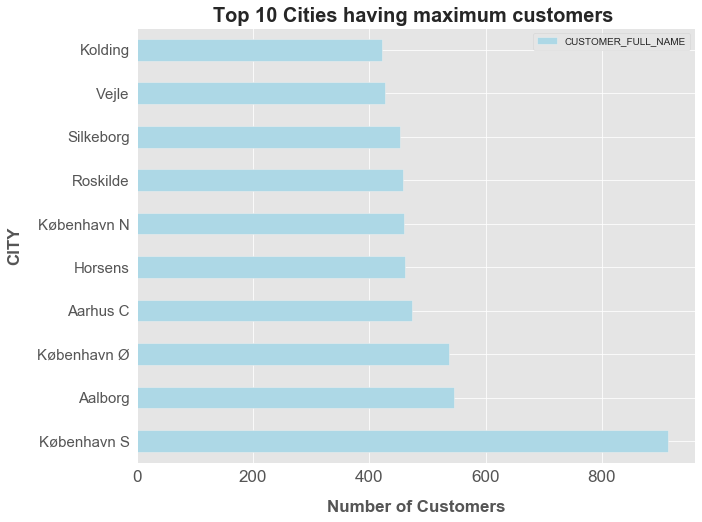

In [14]:
df_location = df5.groupby('CUSTOMER_CITY')['CUSTOMER_FULL_NAME'].nunique()\
                         .reset_index()
            

df_location.nlargest(10, 'CUSTOMER_FULL_NAME').plot(kind='barh',x='CUSTOMER_CITY',color='lightblue' ,figsize = (10,8))

plt.xlabel("Number of Customers", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("CITY", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("Top 10 Cities having maximum customers ", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();



In [12]:
df_locationss = df5[df5['CUSTOMER_CITY'].isin(['København S',
                                 'Aalborg',
                                 'København Ø',
                                 'Aarhus C',
                                 'Horsens',
                                 'København N',
                                 'Roskilde',
                                 'Silkeborg',
                                 'Vejle',
                                 'Kolding'])][['CUSTOMER_POSTCODE', 'CUSTOMER_CITY']]

df_locationss.groupby('CUSTOMER_CITY')['CUSTOMER_POSTCODE'].unique().to_frame()

,CUSTOMER_POSTCODE
CUSTOMER_CITY,
Aalborg,"[9000, 9220, 9320, 9210, 9460, 9200]"
Aarhus C,"[8000, 2300, 8009, 8200]"
Horsens,"[8700, 8940, 8709]"
Kolding,[6000]
København N,"[2200, 2400, 22åå, 2220, 2100]"
København S,"[2300, 2770, 2390, 6261, 2000, 230”]"
København Ø,"[2100, 2109]"
Roskilde,[4000]
Silkeborg,"[8600, 8699, 860p, 8883]"


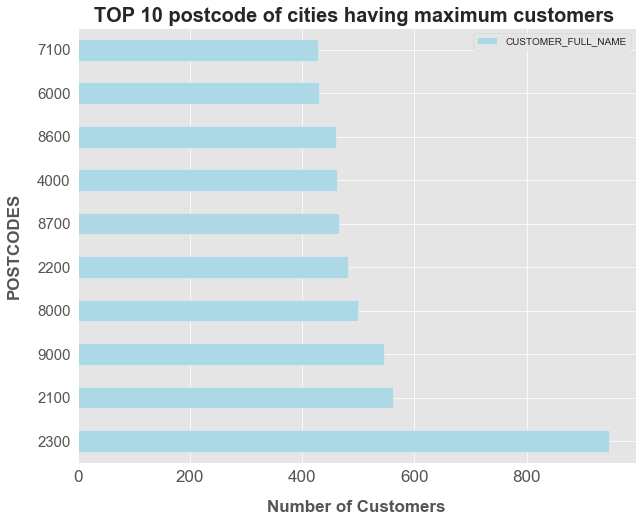

In [13]:
df_location = df5.groupby('CUSTOMER_POSTCODE')['CUSTOMER_FULL_NAME'].nunique()\
                         .reset_index()
            

df_location.nlargest(10, 'CUSTOMER_FULL_NAME').plot(kind='barh',x='CUSTOMER_POSTCODE',color='lightblue' ,figsize = (10,8))

plt.xlabel("Number of Customers", labelpad=15, fontsize = 17 ,weight='bold')
plt.ylabel("POSTCODES", labelpad=15, fontsize = 17 ,weight='bold')
plt.title("TOP 10 postcode of cities having maximum customers ", fontsize = 20 ,weight='bold')
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show();

In [14]:
df_city = df5[df5['CUSTOMER_CITY'].isin(['Aalborg','København Ø','København S'])]['PRODUCT_ID'].value_counts().reset_index()
df_city = df_city.head(10)
df_city_list = df_city['index'].tolist()

In [15]:
df_city

,index,PRODUCT_ID
0,3380,196
1,4632,182
2,2241,100
3,3329,96
4,1377,73
5,2494,72
6,3378,71
7,1713,69
8,3330,67
9,3379,59


In [16]:
df5[df5['PRODUCT_ID'].isin(df_city_list)][['PRODUCT_ID', 'PRODUCT_PRICE']]\
                    .groupby('PRODUCT_ID')['PRODUCT_PRICE'].mean().to_frame().reset_index()

,PRODUCT_ID,PRODUCT_PRICE
0,1377,67.960000
1,1713,39.960000
2,2241,55.949620
3,2494,135.703715
4,3329,7.999458
5,3330,8.000000
6,3378,11.145746
7,3379,13.457483
8,3380,14.323860
9,4632,15.959329


In [17]:
df5[df5['PRODUCT_ID'] == 2494]

,ORDER_DATE,ORDER_STATUS,ORDER_ID,PRODUCT_ID,PRODUCT_PRICE,PRODUCT_AMOUNT,AMOUNT_SPENT,ORDER_TOTAL,PAYMENT_PRICE,PRODUCT_TITLE1,...,CUSTOMER_LASTNAME,CUSTOMER_FULL_NAME,CUSTOMER_COMPANY,CUSTOMER_CVR,CUSTOMER_EAN,CUSTOMER_POSTCODE,CUSTOMER_CITY,CUSTOMER_COUNTRY,CUSTOMER_COUNTRY_ID,CUSTOMER_COUNTRY_CODE
480,2018-07-04 12:49:19,3,103767,2494,135.76,1,135.76,564.25,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Nielsen,LillianNielsen,NaN,NaN,NaN,4622,Havdrup,DK,NaN,NaN
1205,2018-07-10 12:05:51,3,104008,2494,135.76,1,135.76,509.10,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Povlsen,MariannePovlsen,NaN,NaN,NaN,3060,Espergærde,DK,NaN,NaN
1825,2018-07-16 19:05:38,3,104233,2494,135.76,1,135.76,278.55,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Høtoft,NicolaiHøtoft,NaN,NaN,NaN,2200,København N,DK,NaN,NaN
2496,2018-07-22 21:23:47,3,104473,2494,135.76,1,135.76,554.10,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Nielsen,Helle HoltenNielsen,NaN,NaN,NaN,5610,Assens,DK,NaN,NaN
2646,2018-07-23 19:35:29,3,104525,2494,135.76,2,271.52,789.25,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Wium,NinaWium,NaN,NaN,NaN,3230,Græsted,DK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170180,2020-06-27 14:58:46,3,157576,2494,135.76,1,135.76,769.00,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Pedersen,ThaisPedersen,NaN,NaN,NaN,7100,Vejle,DK,NaN,NaN
170320,2020-06-28 13:29:43,3,157622,2494,135.76,1,135.76,998.60,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Conradsen,Thea Conradsen,NaN,NaN,NaN,6650,Brørup,DK,NaN,NaN
171011,2020-06-30 09:18:21,3,157830,2494,135.76,1,135.76,877.65,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Knudsen,JeannetteKnudsen,NaN,NaN,NaN,2630,Taastrup,DK,NaN,NaN
171117,2020-06-30 14:36:32,3,157866,2494,135.76,1,135.76,541.05,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Jensen,Nils Sepstrup Jensen,NaN,NaN,NaN,4930,Maribo,DK,NaN,NaN


In [18]:
print('REVNUE:          ',df5[df5['PRODUCT_ID'] == 2494]['AMOUNT_SPENT'].sum())

print('\nQUANTITY SOLD: ',df5[df5['PRODUCT_ID'] == 2494]['PRODUCT_AMOUNT'].sum())



REVNUE:           168193.37

QUANTITY SOLD:  1278


In [19]:
df5.insert(loc=10, column='DAY_OF_WEEK',  value= df5['ORDER_DATE'].dt.dayofweek)
df5.insert(loc=11, column='WEEK',  value= df5['ORDER_DATE'].dt.week)
df5.insert(loc=12, column='MONTH',  value= df5['ORDER_DATE'].dt.month)

In [20]:
df_2494 = df5[(df5['PRODUCT_ID'] == 2494) & (df5['ORDER_DATE'].dt.quarter == 4)].sort_values('ORDER_DATE')

In [23]:
df_2494

,ORDER_DATE,ORDER_STATUS,ORDER_ID,PRODUCT_ID,PRODUCT_PRICE,PRODUCT_AMOUNT,AMOUNT_SPENT,ORDER_TOTAL,PAYMENT_PRICE,PRODUCT_TITLE1,...,CUSTOMER_LASTNAME,CUSTOMER_FULL_NAME,CUSTOMER_COMPANY,CUSTOMER_CVR,CUSTOMER_EAN,CUSTOMER_POSTCODE,CUSTOMER_CITY,CUSTOMER_COUNTRY,CUSTOMER_COUNTRY_ID,CUSTOMER_COUNTRY_CODE
14110,2018-10-01 17:23:51,3,108101,2494,135.76,1,135.76,398.65,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Andersen,Jørn StigAndersen,NaN,NaN,NaN,7100,Vejle,DK,NaN,NaN
14509,2018-10-03 13:18:25,3,108214,2494,135.76,1,135.76,383.60,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Lautrup,LeneLautrup,NaN,NaN,NaN,5900,Rudkøbing,DK,NaN,NaN
15056,2018-10-06 12:36:32,3,108375,2494,135.76,1,135.76,504.37,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Knudsen,MortenKnudsen,NaN,NaN,NaN,2610,Rødovre,DK,NaN,NaN
15123,2018-10-06 21:03:47,3,108395,2494,135.76,1,135.76,523.55,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Laksafoss,HjørdisLaksafoss,NaN,NaN,NaN,3480,Fredensborg,DK,NaN,NaN
15644,2018-10-09 11:01:37,3,108558,2494,135.76,2,271.52,512.37,0,"Callebaut chokolade mørk - 54,5 % kakao, 1 kg",...,Mika,Anne-LiseMika,NaN,NaN,NaN,4874,Gedser,DK,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109335,2019-12-17 10:52:45,3,138830,2494,135.76,1,135.76,294.65,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Eriksen,DanielleEriksen,NaN,NaN,NaN,6000,Kolding,DK,NaN,NaN
109351,2019-12-17 11:56:26,3,138838,2494,135.76,1,135.76,665.70,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Randrup,SigneRandrup,NaN,NaN,NaN,9320,Hjallerup,DK,NaN,NaN
109428,2019-12-17 14:42:42,3,138868,2494,135.76,1,135.76,1467.60,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Bøgh,SaraBøgh,NaN,NaN,NaN,2920,Charlottenlund,DK,NaN,NaN
109474,2019-12-17 16:37:28,3,138888,2494,135.76,1,135.76,1145.45,0,"Callebaut mørk chokolade 54,5 % kakao, 1 kg.",...,Errebo-Bache,MarianneErrebo-Bache,NaN,NaN,NaN,4000,Roskilde,DK,NaN,NaN


In [21]:
df_delivery = df5[df5['CUSTOMER_CITY'].isin(['Aalborg','København Ø','København S'])]

In [22]:
df_delivery[df_delivery['CUSTOMER_CITY'] == 'Aalborg']['DELIVERY_PRICE'].value_counts()

Series([], Name: DELIVERY_PRICE, dtype: int64)